# **Heart Disease Prediction**

This dataset consists of 11 features and a target variable. It has 6 nominal variables and 5 numeric variables. The detailed description of all the features are as follows:

1. Age: Patients Age in years (Numeric)
2. Sex: Gender of patient (Male - 1, Female - 0) (Nominal)
3. Chest Pain Type: Type of chest pain experienced by patient categorized into 1 typical, 2 typical angina, 3 non-anginal pain, 4 asymptomatic (Nominal)
4. resting bp s: Level of blood pressure at resting mode in mm/HG (Numerical)
5. cholestrol: Serum cholestrol in mg/dl (Numeric)
6. fasting blood sugar: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
7. resting ecg: Result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy (Nominal)
8. max heart rate: Maximum heart rate achieved (Numeric)
9. exercise angina: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
10. oldpeak: Exercise induced ST-depression in comparison with the state of rest (Numeric)
11. ST slope: ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping (Nominal)

Target variable
12. target: It is the target variable which we have to predict 1 means patient is suffering from heart risk and 0 means patient is normal.

**1 means patient is suffering from heart risk and** 

**0 means patient is normal.**

**Dataset:** https://www.kaggle.com/code/faressayah/predicting-heart-disease-using-machine-learning

https://www.linkedin.com/feed/update/urn:li:activity:7024029461385756672/

In [89]:
# import required libraries
import numpy as np
import numpy as pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report

from sklearn.model_selection import GridSearchCV

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

sns.set()

In [3]:
data = pd.read_csv("/content/heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
data.shape

(918, 12)

In [4]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

### **Separate the Categorical and Numerical Columns**

**1. Categorical Columns Implementation**

In [15]:
cat_col = [colm for colm in data.columns if data[colm].dtype == "O"]
cat_col

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [17]:
Categorical_Col = data[cat_col]
Categorical_Col.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [19]:
Categorical_Col.shape

(918, 5)

In [63]:
Categorical_Col.isnull().sum()

Sex               0
ChestPainType     0
RestingECG        0
ExerciseAngina    0
ST_Slope          0
dtype: int64

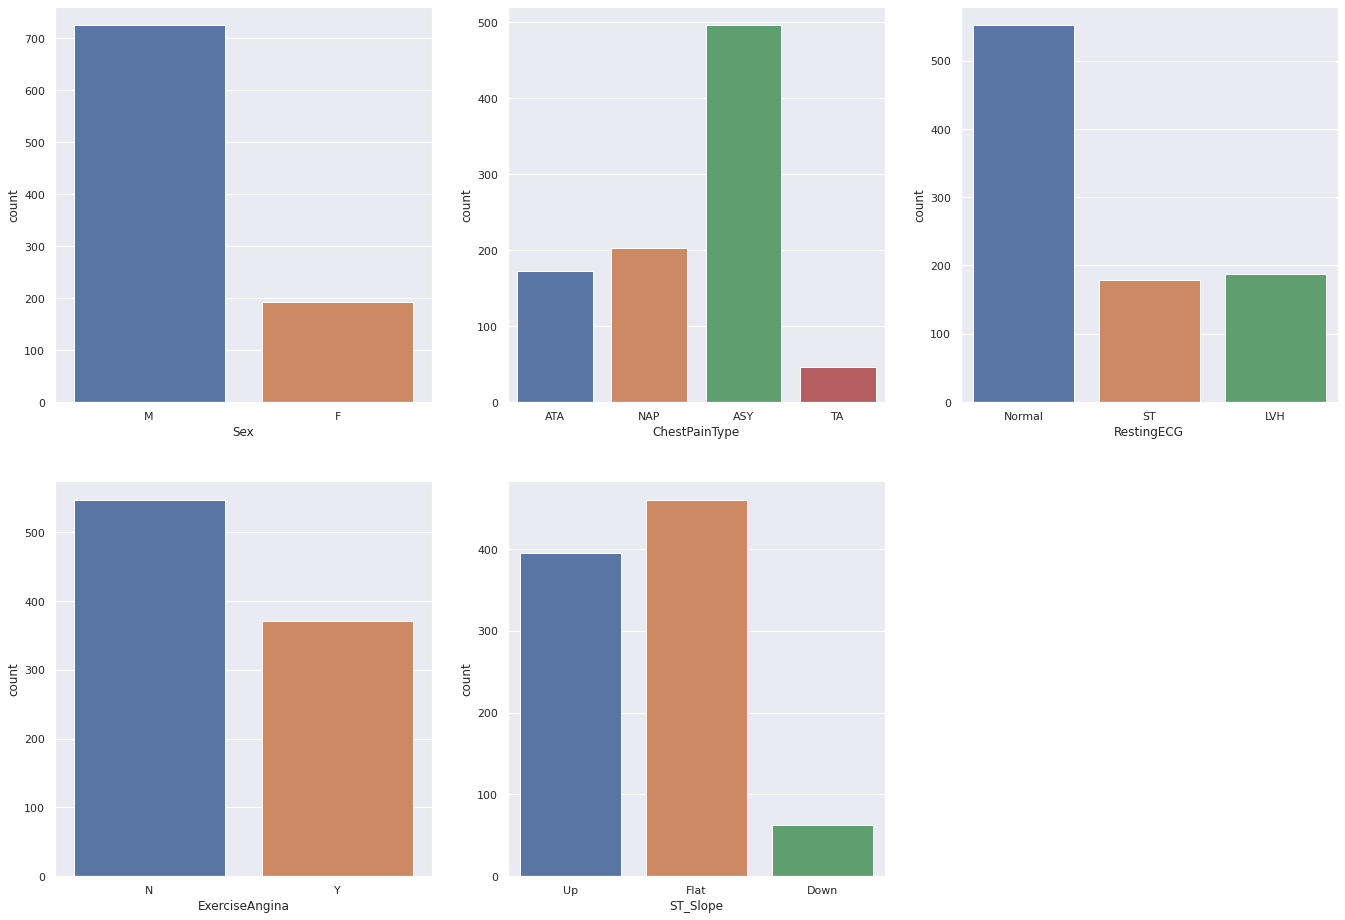

In [26]:
plt.figure(figsize=(23,16))
plotnumber = 1

for column in Categorical_Col:
  if plotnumber <= 6:
    ax = plt.subplot(2,3,plotnumber)
    sns.countplot(data[column])
    plt.xlabel(column)
  plotnumber+=1
plt.show()

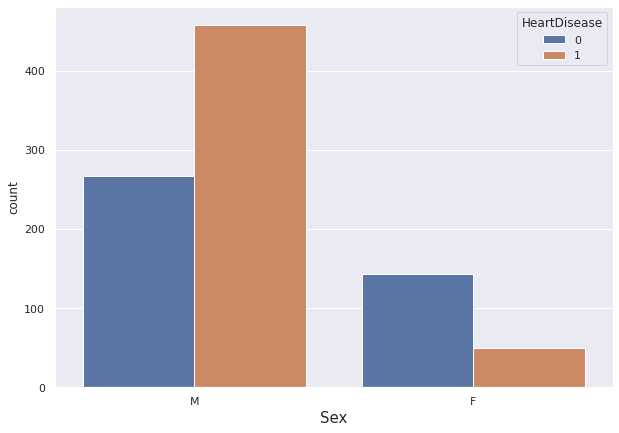

In [28]:
plt.figure(figsize=(10,7))
sns.countplot(data=data,
              x = "Sex",
              hue = "HeartDisease")
plt.xlabel("Sex",fontsize = 15)
plt.show()

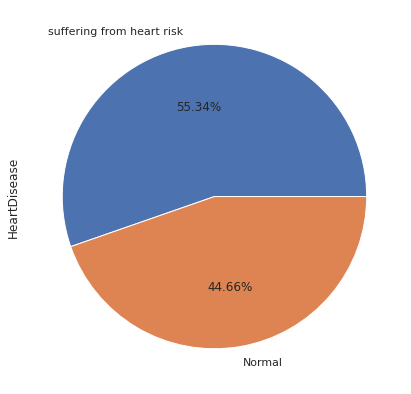

In [40]:
class_labels = ["suffering from heart risk ","Normal"]
plt.figure(figsize = (7,7))
data["HeartDisease"].value_counts().plot(kind = "pie",autopct = "%0.2f%%",labels = class_labels)
plt.show()

In [41]:
Categorical_Col.columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

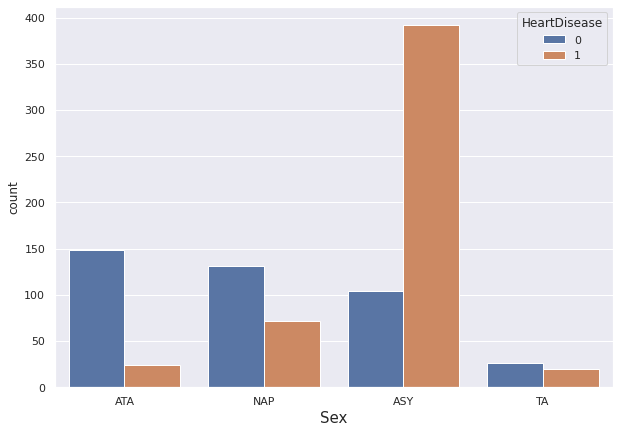

In [42]:
plt.figure(figsize=(10,7))
sns.countplot(data=data,
              x = "ChestPainType",
              hue = "HeartDisease")
plt.xlabel("Sex",fontsize = 15)
plt.show()

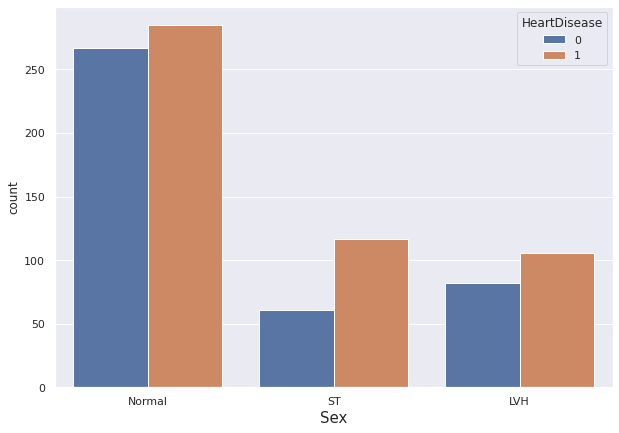

In [43]:
plt.figure(figsize=(10,7))
sns.countplot(data=data,
              x = "RestingECG",
              hue = "HeartDisease")
plt.xlabel("Sex",fontsize = 15)
plt.show()

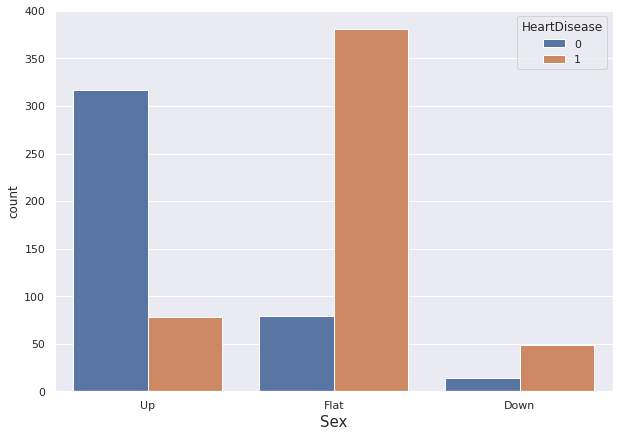

In [44]:
plt.figure(figsize=(10,7))
sns.countplot(data=data,
              x = "ST_Slope",
              hue = "HeartDisease")
plt.xlabel("Sex",fontsize = 15)
plt.show()

**Encoding Categorical Data "Label Encoder"**

In [91]:
Categorical_Col.columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [90]:
lr = LabelEncoder()

In [92]:
cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for col in cols:
  Categorical_Col[col] = lr.fit_transform(Categorical_Col[col])

In [94]:
Categorical_Col.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2


In [98]:
Categorical_Col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sex             918 non-null    int64
 1   ChestPainType   918 non-null    int64
 2   RestingECG      918 non-null    int64
 3   ExerciseAngina  918 non-null    int64
 4   ST_Slope        918 non-null    int64
dtypes: int64(5)
memory usage: 36.0 KB


**2. Numerical Columns Implementation**

In [47]:
num_col = [clm for clm in data.columns if data[clm].dtype != "O"]
num_col

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [50]:
Numerical_Col = data[num_col]
Numerical_Col.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [51]:
Numerical_Col.shape

(918, 7)

In [62]:
Numerical_Col.isnull().sum()

Age             0
RestingBP       0
Cholesterol     0
FastingBS       0
MaxHR           0
Oldpeak         0
HeartDisease    0
dtype: int64

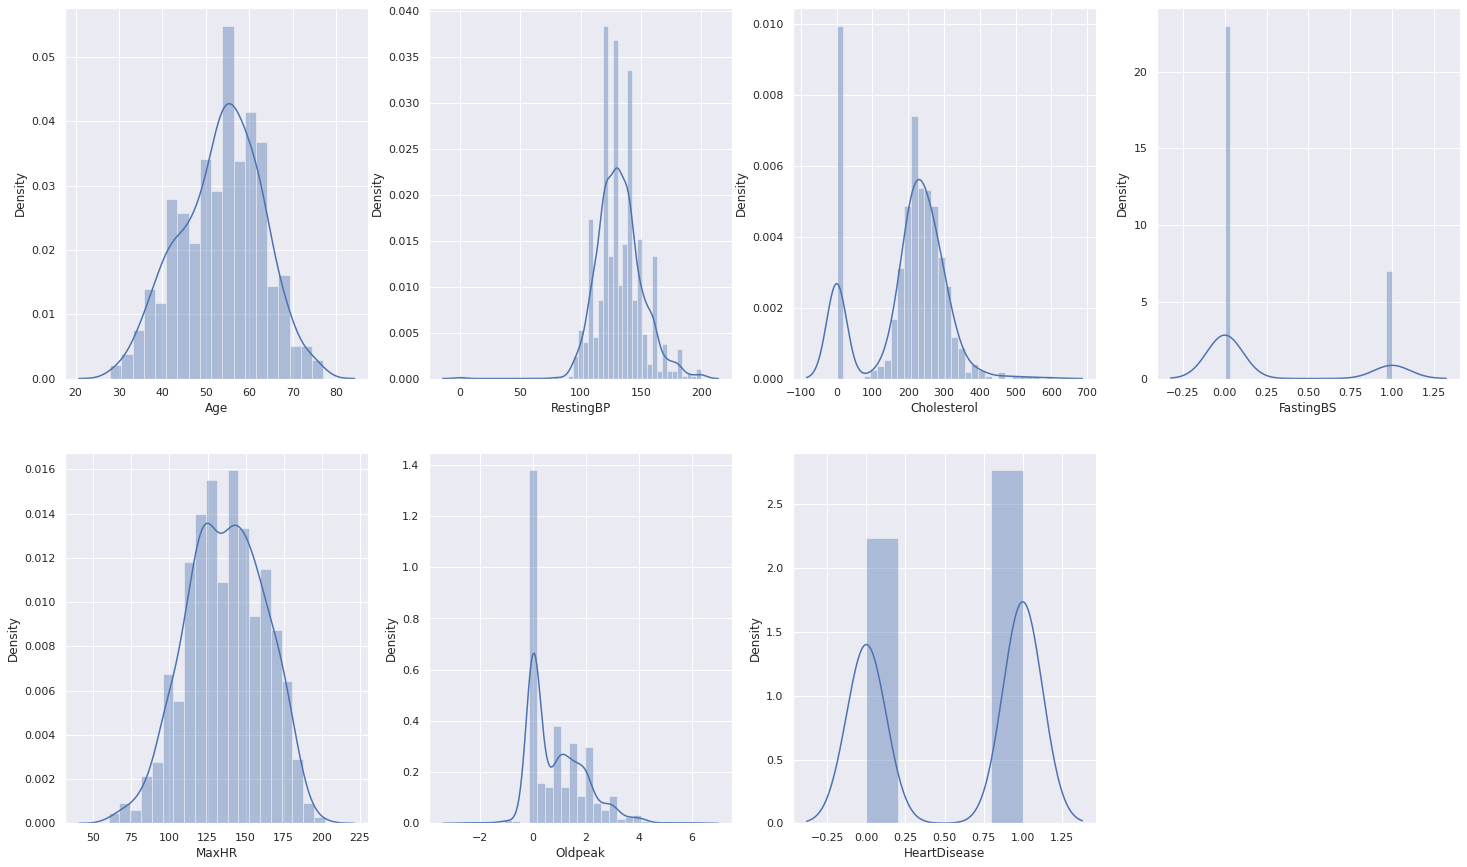

In [55]:
plt.figure(figsize=(25,15))
plotnumber = 1

for column in Numerical_Col:
  if plotnumber <= 8:
    ax = plt.subplot(2,4,plotnumber)
    sns.distplot(Numerical_Col[column])
    plt.xlabel(column)
  plotnumber+=1
plt.show()

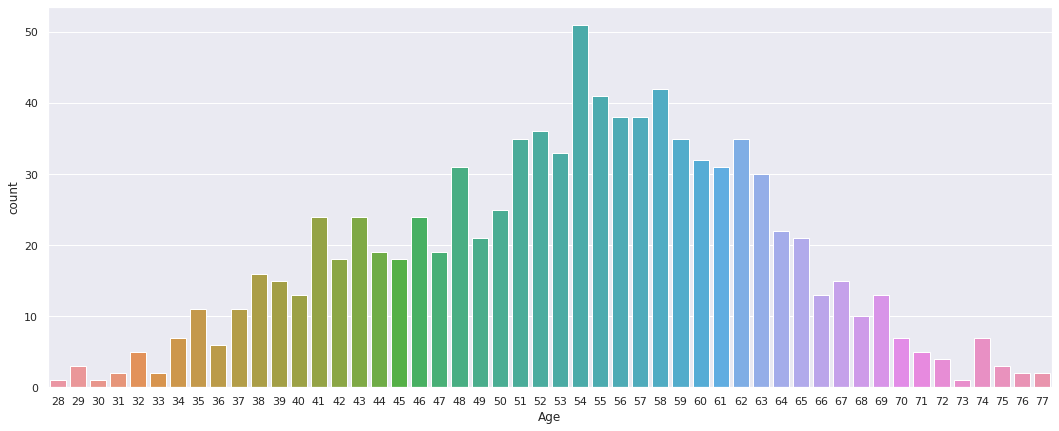

In [60]:
plt.figure(figsize=(18,7))
sns.countplot(Numerical_Col["Age"])

In [64]:
Numerical_Col.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [66]:
Numerical_Col["Cholesterol"] = Numerical_Col["Cholesterol"].replace(0,Numerical_Col["Cholesterol"].mean())
Numerical_Col["FastingBS"] = Numerical_Col["FastingBS"].replace(0,Numerical_Col["FastingBS"].mean())
Numerical_Col["Oldpeak"] = Numerical_Col["Oldpeak"].replace(0,Numerical_Col["Oldpeak"].mean())

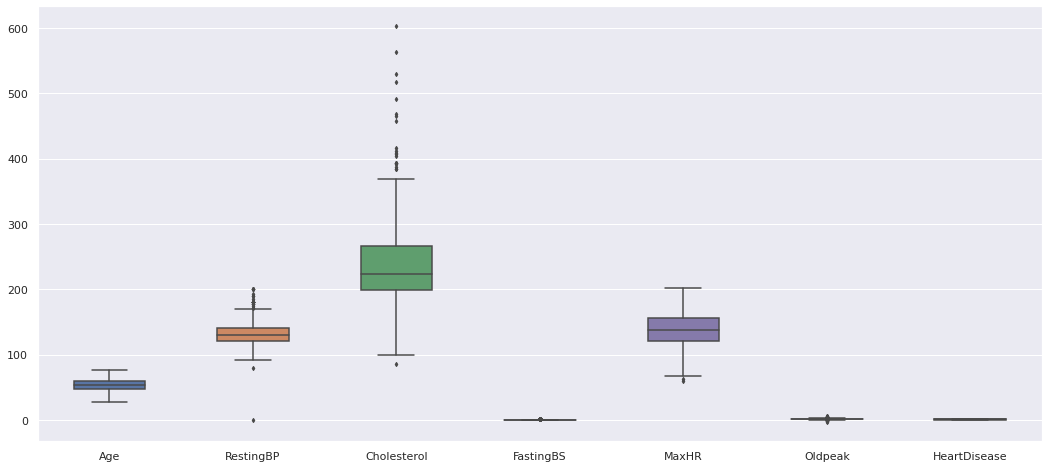

In [73]:
fig,ax = plt.subplots(figsize = (18,8))
sns.boxplot(data=Numerical_Col,width = 0.5,fliersize = 3,ax=ax)

Handling Outliers

In [122]:
df2 = Numerical_Col.copy()

In [123]:
def outlier_remove_IQR(column):
 # Finding outliers
 percentile_25 = df2[column].quantile(.25)
 percentile_75 = df2[column].quantile(.72)
 IQR = percentile_75 - percentile_25
 upper_lmt = percentile_75 + 1.5*IQR
 lower_lmt = percentile_25 - 1.5*IQR
 print('25 Percentile : ',percentile_25)
 print('75 percentile : ',percentile_75)
 print('Upper limit is : ',upper_lmt)
 print('Lower limit is : ',lower_lmt)
 print('IQR is : ',IQR)
 df2[column] = np.where(df2[column]>upper_lmt,upper_lmt,np.where(df2[column]<lower_lmt,lower_lmt,df2[column]))
 

In [124]:
def comparison_plot(data,df2,column):
 # Comparing data of before and after outlier handling
 plt.figure(figsize=(15,10))
 plt.subplot(2,2,1)
 sns.distplot(data[column])
 plt.subplot(2,2,2)
 sns.boxplot(data[column])
 plt.subplot(2,2,3)
 sns.distplot(df2[column])
 plt.subplot(2,2,4)
 sns.boxplot(df2[column])
 plt.show()


**Removing Outliers from Cholesterol feature**

In [125]:
outlier_remove_IQR('Cholesterol')

25 Percentile :  198.7995642701525
75 percentile :  261.0
Upper limit is :  354.30065359477123
Lower limit is :  105.49891067538125
IQR is :  62.2004357298475


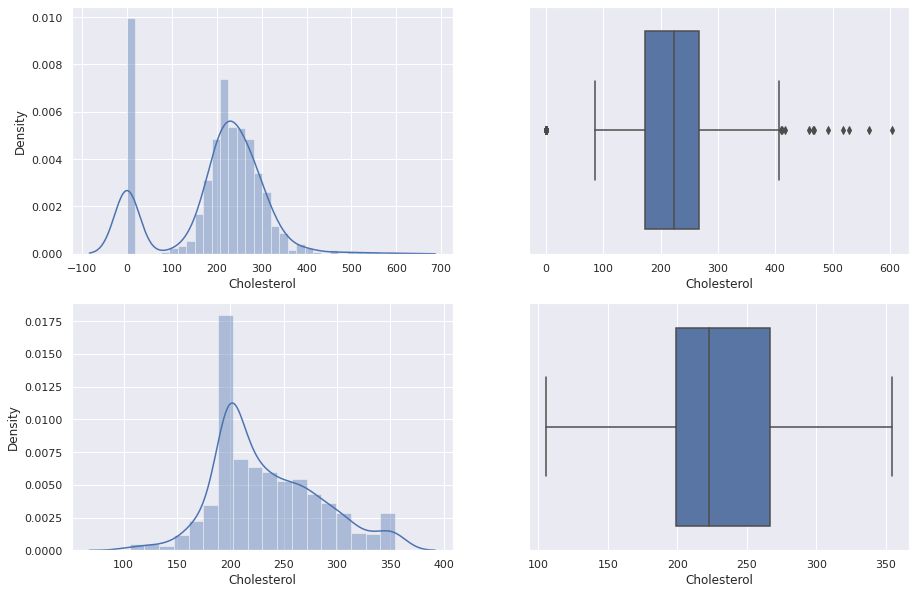

In [126]:
comparison_plot(data,df2,'Cholesterol')

**Removing Outliers from RestingBP feature**

In [127]:
outlier_remove_IQR("RestingBP")

25 Percentile :  120.0
75 percentile :  140.0
Upper limit is :  170.0
Lower limit is :  90.0
IQR is :  20.0


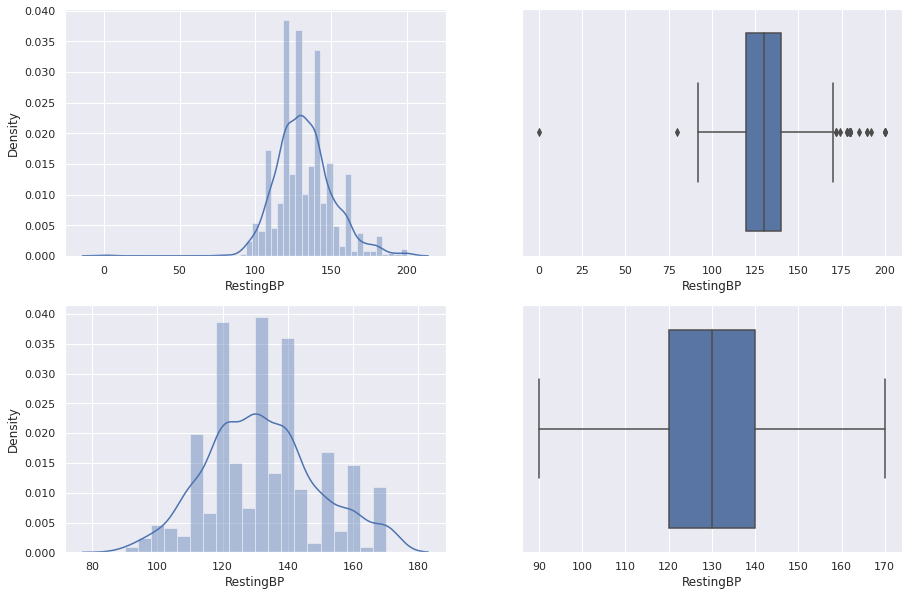

In [128]:
comparison_plot(data,df2,"RestingBP")

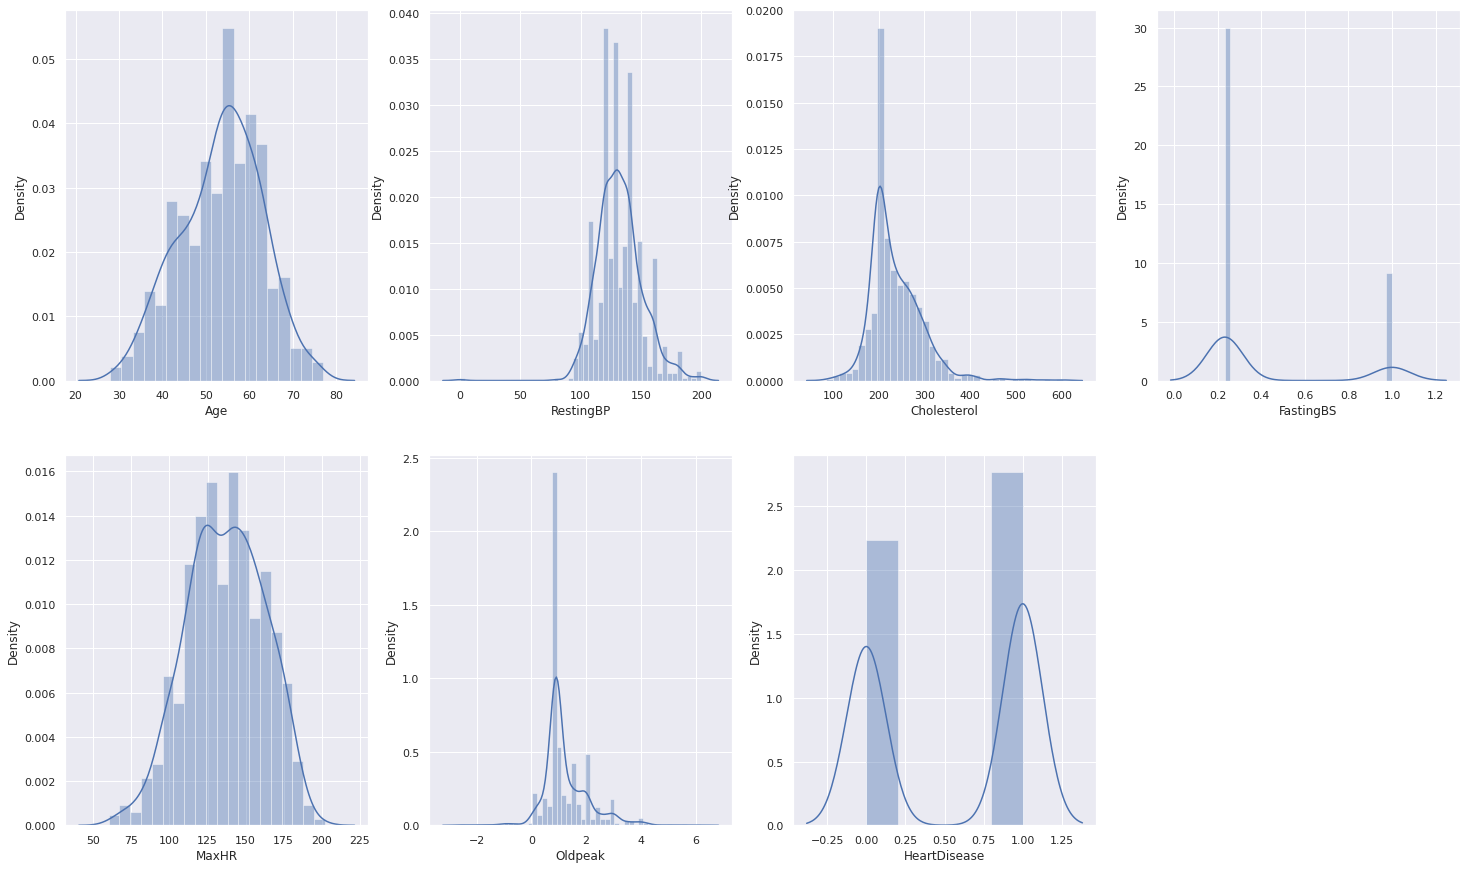

In [129]:
plt.figure(figsize=(25,15))
plotnumber = 1

for column in Numerical_Col:
  if plotnumber <= 8:
    ax = plt.subplot(2,4,plotnumber)
    sns.distplot(Numerical_Col[column])
    plt.xlabel(column)
  plotnumber+=1
plt.show()

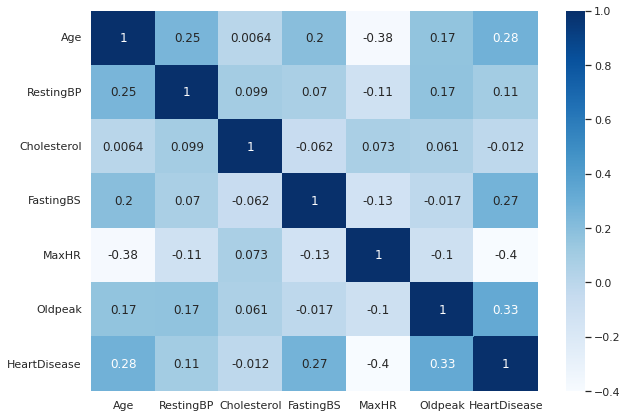

In [130]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,7))
sns.heatmap(Numerical_Col.corr(), cmap='Blues',annot = True)

### **Concatenate Categorical and Numerical**

In [131]:
df = pd.concat([Categorical_Col,Numerical_Col],axis=1)
df.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,1,0,2,40,140,289.0,0.233115,172,0.887364,0
1,0,2,1,0,1,49,160,180.0,0.233115,156,1.000000,1
2,1,1,2,0,2,37,130,283.0,0.233115,98,0.887364,0
3,0,0,1,1,1,48,138,214.0,0.233115,108,1.500000,1
4,1,2,1,0,2,54,150,195.0,0.233115,122,0.887364,0


In [132]:
df.describe()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.789760,0.781046,0.989107,0.404139,1.361656,53.510893,132.396514,236.047413,0.411888,136.809368,1.243083,0.553377
std,0.407701,0.956519,0.631671,0.490992,0.607056,9.432617,18.514154,56.240952,0.324427,25.460334,0.833608,0.497414
min,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,85.000000,0.233115,60.000000,-2.600000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,47.000000,120.000000,198.799564,0.233115,120.000000,0.887364,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,54.000000,130.000000,223.000000,0.233115,138.000000,0.887364,1.000000
75%,1.000000,2.000000,1.000000,1.000000,2.000000,60.000000,140.000000,267.000000,0.233115,156.000000,1.500000,1.000000
max,1.000000,3.000000,2.000000,1.000000,2.000000,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             918 non-null    int64  
 1   ChestPainType   918 non-null    int64  
 2   RestingECG      918 non-null    int64  
 3   ExerciseAngina  918 non-null    int64  
 4   ST_Slope        918 non-null    int64  
 5   Age             918 non-null    int64  
 6   RestingBP       918 non-null    int64  
 7   Cholesterol     918 non-null    float64
 8   FastingBS       918 non-null    float64
 9   MaxHR           918 non-null    int64  
 10  Oldpeak         918 non-null    float64
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 86.2 KB


In [134]:
df.shape

(918, 12)

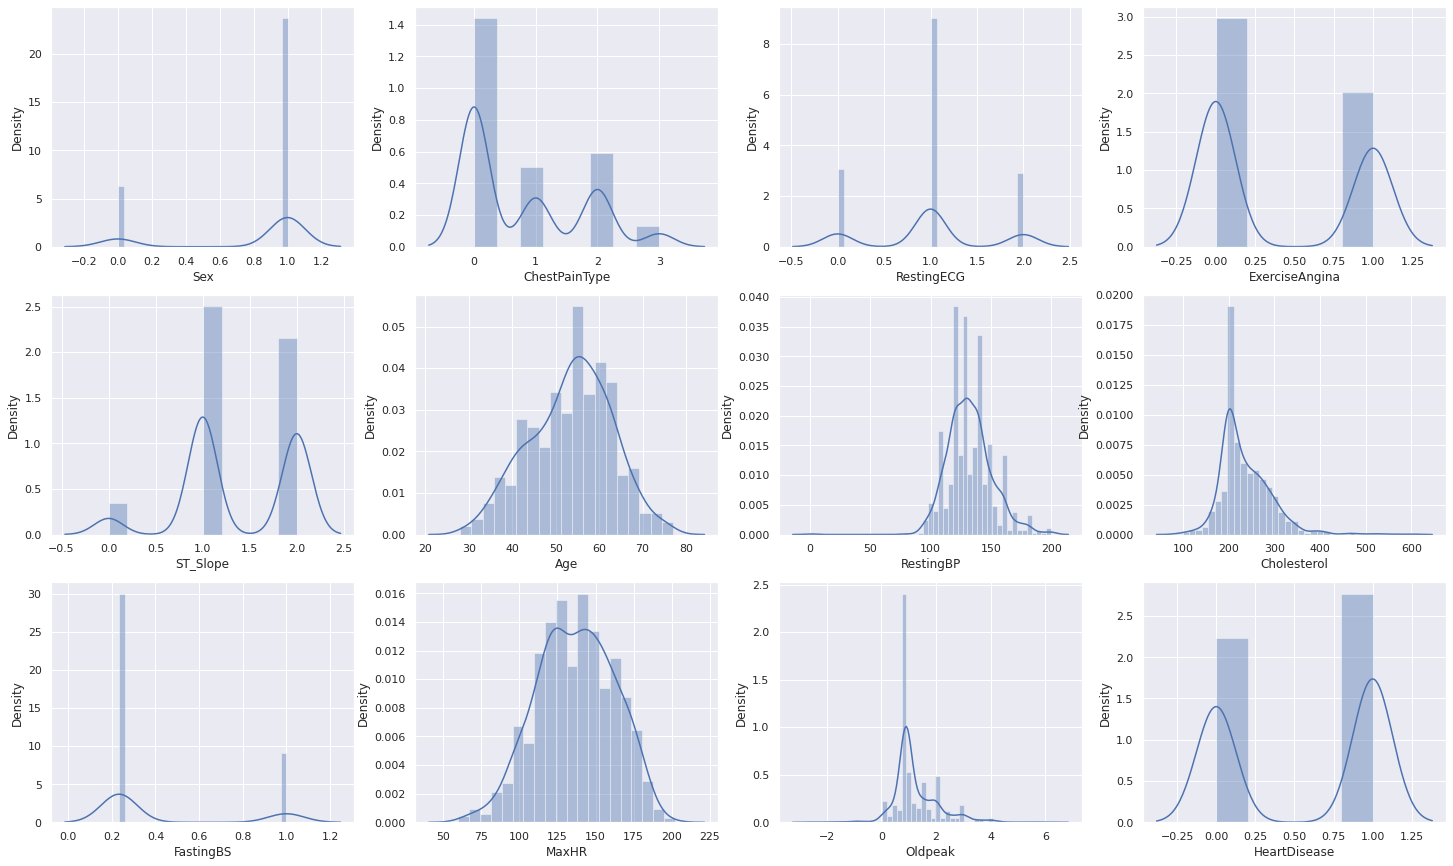

In [135]:
plt.figure(figsize=(25,15))
plotnumber = 1

for column in df:
  if plotnumber <= 13:
    ax = plt.subplot(3,4,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column)
  plotnumber+=1
plt.show()

**Split Independent and Dependent Features**

In [139]:
X = df.drop(columns = ["HeartDisease"],axis = 1)
y = df["HeartDisease"] 

In [140]:
X.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,1,1,1,0,2,40,140,289.0,0.233115,172,0.887364
1,0,2,1,0,1,49,160,180.0,0.233115,156,1.000000
2,1,1,2,0,2,37,130,283.0,0.233115,98,0.887364
3,0,0,1,1,1,48,138,214.0,0.233115,108,1.500000
4,1,2,1,0,2,54,150,195.0,0.233115,122,0.887364


In [141]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

**Feature Scaling**

In [142]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [143]:
X_scaled

array([[ 0.51595242,  0.22903206,  0.01725451, ..., -0.55134134,
         1.38292822, -0.42695473],
       [-1.93816322,  1.27505906,  0.01725451, ..., -0.55134134,
         0.75415714, -0.29176216],
       [ 0.51595242,  0.22903206,  1.60121899, ..., -0.55134134,
        -1.52513802, -0.42695473],
       ...,
       [ 0.51595242, -0.81699495,  0.01725451, ..., -0.55134134,
        -0.85706875, -0.05171036],
       [-1.93816322,  0.22903206, -1.56670996, ..., -0.55134134,
         1.4615246 , -0.42695473],
       [ 0.51595242,  1.27505906,  0.01725451, ..., -0.55134134,
         1.42222641, -0.42695473]])

***VIF***

In [144]:
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [145]:
vif

,VIF,Features
0,1.096674,Sex
1,1.203187,ChestPainType
2,1.065563,RestingECG
3,1.490605,ExerciseAngina
4,1.505787,ST_Slope
5,1.313538,Age
6,1.114733,RestingBP
7,1.065010,Cholesterol
8,1.096160,FastingBS
9,1.476659,MaxHR


**Splitting the data for training and Testing**

In [146]:
#split the data into training and testing

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state = 10)

In [147]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (734, 11)
Shape of X Test:  (184, 11)
Shape of y Train:  (734,)
Shape of y Test:  (184,)


**Implementing Algorithms**

In [162]:
def ML_model(model):
  #model = LogisticRegression()
  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)
# print(y_pred)

#Evaluation for Logistic Regression
# Accuracy,F1_Score, Precision_Score,Recall_Score
  print("Confusion Matrix :\n ",(confusion_matrix(y_test,y_pred)))
  print()
  print("Accuracy_Score: ", round(accuracy_score(y_test,y_pred)*100,3),"%")
  print()
  print("F1 Score: ", round(f1_score(y_test,y_pred)*100,3),"%")
  print("Precision Score: ", round(precision_score(y_test,y_pred)*100,3),"%")
  print("Recall Score :", round(recall_score(y_test,y_pred)*100,3),"%")
  #print("AUC Score :", roc_auc_score(y_test,y_pred))
  print("\n")
#Entire Report of the Model
  print("Entire Report of the Model: \n", (classification_report(y_test,y_pred)))
  plt.show()

In [163]:
classifier = ML_model(LogisticRegression())
classifier

Confusion Matrix :
  [[67 19]
 [15 83]]

Accuracy_Score:  81.522 %

F1 Score:  83.0 %
Precision Score:  81.373 %
Recall Score : 84.694 %


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.82      0.78      0.80        86
           1       0.81      0.85      0.83        98

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



In [164]:
ML_model(DecisionTreeClassifier())

Confusion Matrix :
  [[65 21]
 [21 77]]

Accuracy_Score:  77.174 %

F1 Score:  78.571 %
Precision Score:  78.571 %
Recall Score : 78.571 %


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.76      0.76      0.76        86
           1       0.79      0.79      0.79        98

    accuracy                           0.77       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.77      0.77      0.77       184



In [165]:
ML_model(RandomForestClassifier())

Confusion Matrix :
  [[71 15]
 [16 82]]

Accuracy_Score:  83.152 %

F1 Score:  84.103 %
Precision Score:  84.536 %
Recall Score : 83.673 %


Entire Report of the Model: 
               precision    recall  f1-score   support

           0       0.82      0.83      0.82        86
           1       0.85      0.84      0.84        98

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



**Save the Model**

In [166]:
# Save the Model
import pickle
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(classifier, open(filename, 'wb'))